In [163]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import pdb
import numpy as np
db = pdb.set_trace
import sys
sys.path = [r'C:\Github\fileio'] + sys.path
import fileio
import fivecentplots as fcp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## keyword docs

In [166]:
file = r'C:\GitHub\fivecentplots\fivecentplots\keywords.xlsx'

In [226]:
df = pd.read_excel(file, sheet_name='Data')

In [227]:
df

,Keyword,Data Type,Description,Default,Example
0,auto_scale,True,enable/disable auto-scaling feature for one-si...,True,`auto-scale <ranges.html#Primary-axes-only>`_
1,NaN,NaN,specification; not allowed for heatmap or hist...,NaN,NaN
2,col,str,name of DataFrame column to use for column-bas...,None,`column plot <plot.html#Column-plot>`_
3,fig_groups,str|list of str,DataFrame column(s) to use for figure-level gr...,None,`figure plots <grouping.html#figure-plots>`_
4,filter,str,string-based DataFrame filter (similar to quer...,None,see most plot examples
5,ncol,int,specify the number of columns in a wrap plot,try to make square grid,`compare two cases <grouping.html?highlight=nc...
6,row,str,name of DataFrame column to use for row-based ...,None,`row plot <plot.html#Row-plot>`_
7,share_x,boolean,enable primary x-axis range sharing across all...,True,`axis sharing <ranges.html#Axes-sharing>`_
8,share_y,boolean,enable primary y-axis range sharing across all...,True,NaN
9,share_z,boolean,enable primary z-axis range sharing across all...,True,NaN


In [228]:
width = pd.DataFrame(columns=df.columns, index=[0])
for col in df.columns:
    width[col] = max(df[col].apply(lambda x: len(str(x))).max(), len(col)) + 2
width

,Keyword,Data Type,Description,Default,Example
0,12,17,68,25,70


In [229]:
line = ''
for col in width.columns:
    line += '+' + '-'*width[col].iloc[0]
line += '+\n'

In [230]:
tab = ''
for irow, row in df.iterrows():
    for col, value in row.items():
        tab += (('| %s ' % value).ljust(width[col].iloc[0]+1)).replace('nan', '   ')
    tab += '|\n'
    # check for vertical merged
    line0 = ('%s' % line).split('+')
    if irow < len(df) - 1:
        nrow = df.iloc[irow+1]
        for icol, (col, value) in enumerate(nrow.items()):
            if type(value) is float and np.isnan(value):
                line0[icol+1] = line0[icol+1].replace('-', ' ')
    line0 = '+'.join(line0)
    tab += line0
#print(tab)

In [231]:
header = line
for col in df.columns:
    header += ('| %s ' % col).ljust(width[col].iloc[0]+1)
header += '|\n'
header += line.replace('-', '=')
#print(header)

In [232]:
print(header + tab)

+------------+-----------------+--------------------------------------------------------------------+-------------------------+----------------------------------------------------------------------+
| Keyword    | Data Type       | Description                                                        | Default                 | Example                                                              |
+============+=================+====================================================================+=========================+======================================================================+
| auto_scale | True            | enable/disable auto-scaling feature for one-side range             | True                    | `auto-scale <ranges.html#Primary-axes-only>`_                        |
+            +                 +--------------------------------------------------------------------+                         +                                                                      +
|    

In [11]:
print(fileio.utilities.xls_2_rst(file, 'Contour'))

+--------------+-----------+----------------------------------------+---------+--------------------------------------------------+
| Keyword      | Data Type | Description                            | Default | Example                                          |
+==============+===========+========================================+=========+==================================================+
| :hh:`cmap`   | str       | Name of a color map                    | inferno | `contour example <contour.html#Filled-contour>`_ |
+--------------+-----------+----------------------------------------+---------+                                                  +
| :hh:`filled` | boolean   | Fill area between contour lines        | True    |                                                  |
+--------------+-----------+----------------------------------------+---------+                                                  +
| :hh:`levels` | int       | Number of contour lines/levels to draw | 20      |    

In [ ]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', inline=True, show=True, \
              filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',\
              wrap='Substrate', ax_size=[300, 300],  \
              rc_label_fill_color='#fffd75', rc_label_fill_alpha=0.5,\
              rc_label_font_color='#000000', wrap_title_fill_color='#00FFFF', \
              wrap_title_font_color='#000000', label_fill_color='#FF0000', label_fill_alpha=0.5)

## bug fixes

In [3]:
df = pd.read_excel(r'C:\data\Denver_Test_Case.xlsx')

In [4]:
df.head()

,bins,values
0,NaN,6
1,-0.005976,325
2,NaN,14334
3,-0.001976,307513
4,NaN,1453260


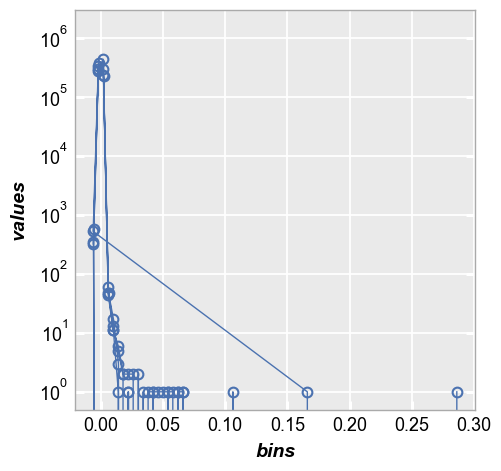

In [30]:
fcp.plot(df, x='bins', y='values', ax_scale='logy')

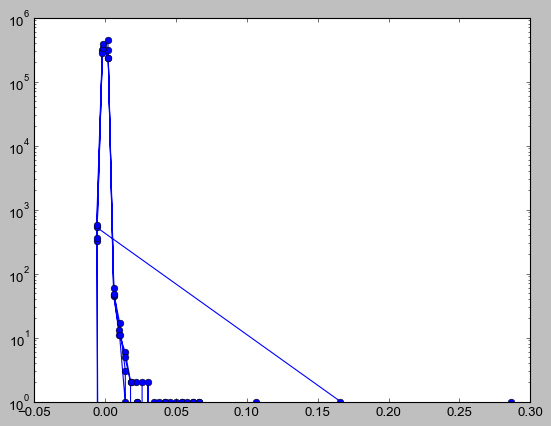

In [27]:
mask = np.isfinite(df['bins'])
plt.semilogy(df[mask]['bins'], df[mask]['values'], 'o-')
plt.show()

In [129]:
def mpl_get_ticks(ax, xon=True, yon=True):
    """
    Divine a bunch of tick and label parameters for mpl layouts

    Args:
        ax (mpl.axes)

    Returns:
        dict of x and y ax tick parameters

    """

    tp = {}
    xy = []
    if xon:
        xy += ['x']
    if yon:
        xy += ['y']

    for vv in xy:
        tp[vv] = {}
        tp[vv]['min'] = min(getattr(ax, 'get_%slim' % vv)())
        tp[vv]['max'] = max(getattr(ax, 'get_%slim' % vv)())
        tp[vv]['ticks'] = getattr(ax, 'get_%sticks' % vv)()
        tp[vv]['labels'] = [f for f in getattr(ax, '%saxis' % vv).iter_ticks()]
        tp[vv]['label_vals'] = [f[1] for f in tp[vv]['labels']]
        tp[vv]['label_text'] = [f[2] for f in tp[vv]['labels']]
        try:
            tp[vv]['first'] = [i for i, f in enumerate(tp[vv]['labels'])
                               if f[1] >= tp[vv]['min'] and f[2] != ''][0]
        except:
            tp[vv]['first'] = -999
        try:
            tp[vv]['last'] = [i for i, f in enumerate(tp[vv]['labels'])
                              if f[1] <= tp[vv]['max'] and f[2] != ''][-1]
        except:
            tp[vv]['last'] = -999

    missing = [f for f in ['x', 'y'] if f not in tp.keys()]
    for mm in missing:
        tp[mm] = {}
        tp[mm]['ticks'] = []
        tp[mm]['labels'] = []
        tp[mm]['label_text'] = []
        tp[mm]['first'] = -999
        tp[mm]['last'] = -999

    return tp

In [104]:
import os
osjoin = os.path.join
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')

In [162]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', ax_size=[225, 225], share_y=False,
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25', xmin=0, xmax=1.6, ymin=[0, 0, 0], ymax=[1.3, 1.8, 5.2],
         engine='bokeh', ref_line=df['Voltage'], ref_line_legend_text='y==x', )

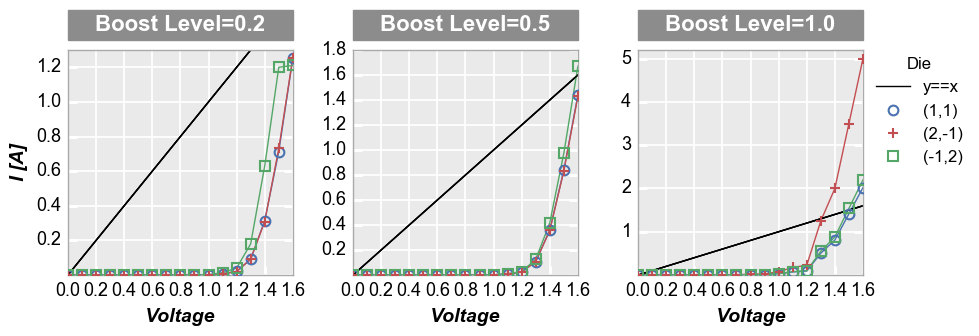

In [144]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', ax_size=[225, 225], share_y=False,
         filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25', ref_line=df['Voltage'], 
         ref_line_legend_text='y==x', xmin=0, xmax=1.6, ymin=[0, 0, 0], ymax=[1.3, 1.8, 5.2])

In [112]:
import matplotlib.pylab as plt
import matplotlib.patches

In [146]:
import natsort
natsort.natsorted(df_boost.Die.unique())

['(1,1)', '(2,-1)', '(-1,2)']

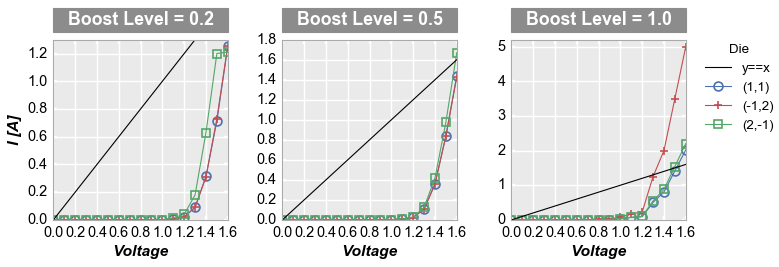

In [150]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')

# Filter the dataframe
df_sub = df[(df.Substrate=="Si")&(df['Target Wavelength']==450)&(df['Temperature [C]']==25)]

# Set some defaults
markers = ['o', '+', 's']
colors = ['#4b72b0', '#c34e52', '#54a767']
ymax = [1.3, 1.8, 5.2]
lines = []

# Create the figure and axes
f, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=[9.82, 3.46])

# Plot the data and style the axes
for iboost, boost in enumerate(df_sub['Boost Level'].unique()):
    df_boost = df_sub[df_sub['Boost Level']==boost]
    for idie, die in enumerate(natsort.natsorted(df_boost.Die.unique())):
        df_die = df_boost[df_boost.Die==die]
        axes[iboost].set_facecolor('#eaeaea')
        axes[iboost].grid(which='major', axis='both', linestyle='-', color='#ffffff', linewidth=1.3)
        lines += axes[iboost].plot(df_die['Voltage'], df_die['I [A]'], '-', color=colors[idie], 
                                   marker=markers[idie], markeredgecolor=colors[idie], markerfacecolor='none', markeredgewidth=1.5, markersize=8)
        axes[iboost].set_axisbelow(True)
        axes[iboost].spines['bottom'].set_color('#aaaaaa')
        axes[iboost].spines['top'].set_color('#aaaaaa') 
        axes[iboost].spines['right'].set_color('#aaaaaa')
        axes[iboost].spines['left'].set_color('#aaaaaa')
        if iboost==0:
            axes[iboost].set_ylabel('I [A]', fontsize=14, fontweight='bold', fontstyle='italic')
        axes[iboost].set_xlabel('Voltage', fontsize=14, fontweight='bold', fontstyle='italic')
    axes[iboost].set_xlim(left=0, right=1.6)
    axes[iboost].set_ylim(bottom=0, top=ymax[iboost])
    
    # Add the column labels
    rect = matplotlib.patches.Rectangle((0, 1.044), 1, 30/225, fill=True, transform=axes[iboost].transAxes,
                                        facecolor='#8c8c8c', edgecolor='#8c8c8c', clip_on=False)
    axes[iboost].add_patch(rect)
    text = 'Boost Level = {}'.format(boost)
    axes[iboost].text(0.5, 1.111, text, transform=axes[iboost].transAxes,
                      horizontalalignment='center', verticalalignment='center', 
                      rotation=0, color='#ffffff', weight='bold', size=16)
    
    # Customize ticks
    axes[iboost].tick_params(axis='both', which='major', pad=5, colors='#ffffff', 
                             labelsize=13, labelcolor='#000000', width=2.2)
    
    # Add reference line
    ref_line = df_die['Voltage']
    ref = axes[iboost].plot(df_die['Voltage'], ref_line, '-', color='#000000', linewidth=1)
    if iboost == 0 :
        lines = ref + lines
    
# Style the figure
f.set_facecolor('#ffffff')
f.subplots_adjust(left=0.077, right=0.882, top=0.827, bottom=0.176, hspace=0.133, wspace=0.313)

# Add legend
leg = f.legend(lines[0:4], ['y==x'] + list(df_boost.Die.unique()), title='Die', numpoints=1,
               bbox_to_anchor=(1, 0.85), prop={'size': 12})
leg.get_frame().set_edgecolor('#ffffff')

# Show the plot
plt.show()

In [90]:
lines